In [36]:
with open("data/Lab1/ex1data1.txt") as ex1_file:
    ex1_data=ex1_file.readlines()

In [37]:
restaurant_data=[list(map(float, line.strip().split(","))) for line in ex1_data]

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


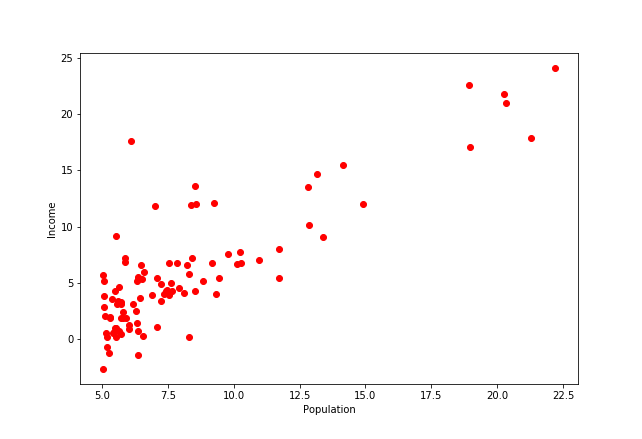

In [12]:
sorted_data=sorted(restaurant_data, key=lambda item: item[0])
plt.figure()
plt.plot(*list(zip(*sorted_data)), 'ro')
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

In [13]:
def get_hypothesis(theta_arr):
    def hypothesis(x_arr):
        x_arr_copy=np.column_stack((np.ones(x_arr.shape[0]), x_arr))
        return np.dot(x_arr_copy, theta_arr)
    return hypothesis

In [14]:
import numpy as np
def get_calculate_cost(get_hypothesis_value):
    def calculate_cost(x_training, y_training):
        return np.sum(np.square(np.subtract(get_hypothesis_value(x_training),y_training)))/(2*x_training.shape[0])
    return calculate_cost

def get_calculate_cost_derivative(get_hypothesis_value):
    def calculate_cost_derivative(x_training, y_training):
        x_arr_copy=np.column_stack((np.ones(x_training.shape[0]), x_training))
        return np.dot(x_arr_copy.T, np.subtract(get_hypothesis_value(x_training),y_training))/x_training.shape[0]
    return calculate_cost_derivative

In [15]:
def gradient_descent(theta_arr, x_training, y_training, eps=0.01, alpha=0.01):
    hypothesis=get_hypothesis(theta_arr)
    current_cost=get_calculate_cost(hypothesis)(x_training, y_training)
    previous_cost=current_cost-2*eps
    current_theta=theta_arr
    while math.fabs(previous_cost-current_cost)>eps:
        calculate_cost_derivative=get_calculate_cost_derivative(hypothesis)
        current_theta=current_theta-alpha*calculate_cost_derivative(x_training, y_training)
        yield current_theta
        previous_cost=current_cost
        hypothesis=get_hypothesis(current_theta)
        current_cost=get_calculate_cost(hypothesis)(x_training, y_training)
    return current_theta

[0.05106363 0.79572981]


<IPython.core.display.Javascript object>


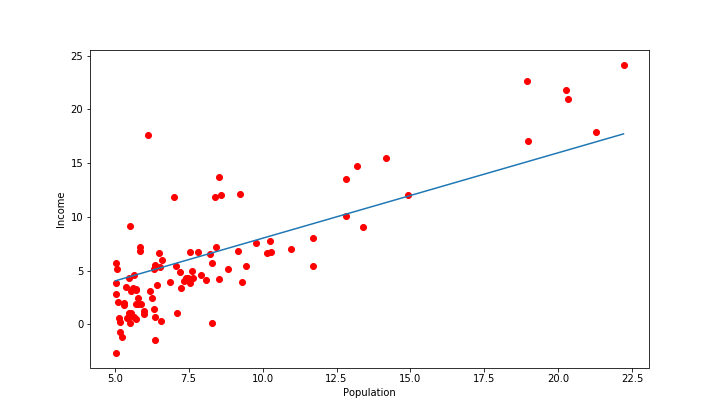

In [16]:
theta_arr=np.array([0, 0])
x_training, y_training=list(zip(*sorted_data))
x_training=np.array(x_training)
y_training=np.array(y_training)
hypothesis=get_hypothesis(theta_arr)
opt_theta=list(gradient_descent(theta_arr, x_training, y_training))[-1]
print(opt_theta)
hypothesis=get_hypothesis(opt_theta)
hypothesis_values=hypothesis(x_training)
plt.figure()
plt.plot(x_training, y_training, 'ro')
plt.plot(x_training, hypothesis_values)
plt.xlabel("Population")
plt.ylabel("Income")
plt.show()

<IPython.core.display.Javascript object>


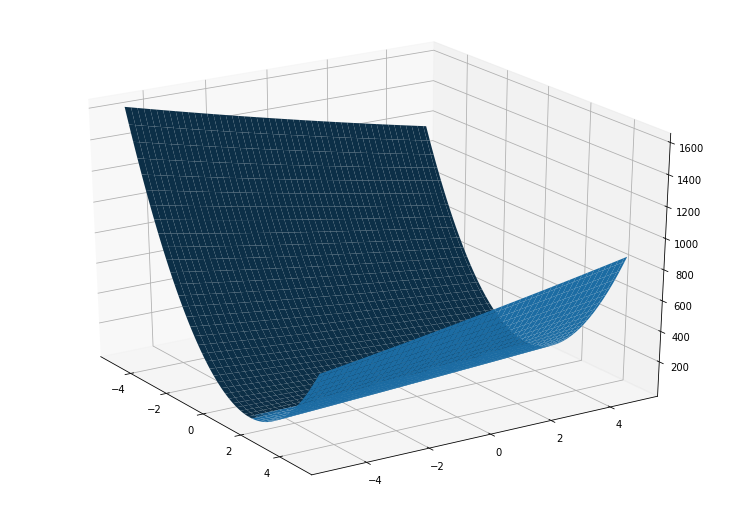

In [19]:
theta_0_arr=np.arange(-5.0, 5.0, 0.1)
theta_1_arr=np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(theta_0_arr, theta_1_arr)
cost_values=np.zeros((theta_0_arr.shape[0], theta_1_arr.shape[0]))
for (ind_0, theta_0) in enumerate(theta_0_arr):
    for (ind_1, theta_1) in enumerate(theta_1_arr):
        cost_values[ind_0, ind_1]=get_calculate_cost(get_hypothesis(np.array([theta_0, theta_1])))(x_training, y_training)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, cost_values)

<IPython.core.display.Javascript object>


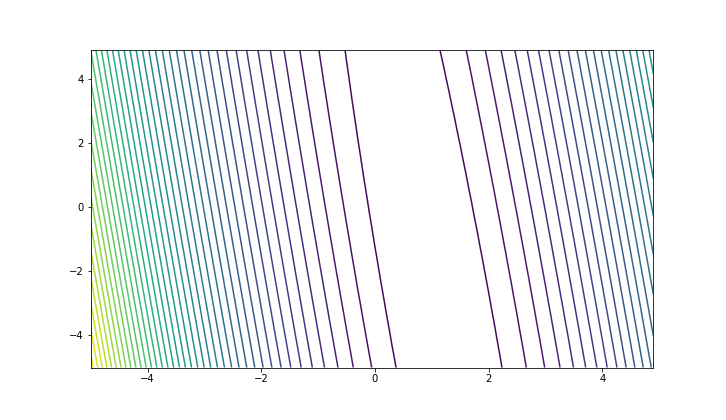

In [21]:
fig, ax = plt.subplots()
ax.contour(X, Y, cost_values, 50)

In [25]:
from collections import namedtuple
House=namedtuple("House", "area, rooms, cost")
with open("data/Lab1/ex1data2.txt") as ex2_file:
    ex2_data=ex2_file.readlines()
houses_data=[House(*list(map(float, line.strip().split(",")))) for line in ex2_data]

In [23]:
area_arr=np.array([house.area for house in houses_data])
rooms_arr=np.array([house.rooms for house in houses_data])
cost_arr=np.array([house.cost for house in houses_data])
area_mean=np.mean(area_arr)
area_std=np.std(area_arr)
rooms_mean=np.mean(rooms_arr)
rooms_std=np.std(rooms_arr)
cost_mean=np.mean(cost_arr)
cost_std=np.std(cost_arr)
houses_data_normalized=[House((area-area_mean)/area_std, (rooms-rooms_mean)/rooms_std, (cost-cost_mean)/cost_std) for (area, rooms, cost) in houses_data]

<IPython.core.display.Javascript object>


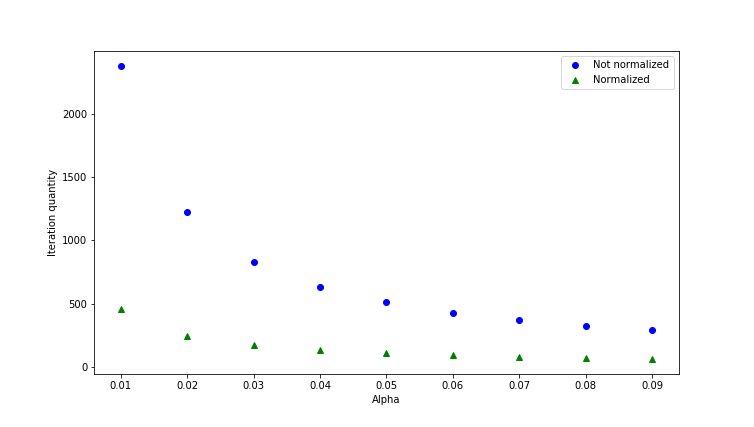

In [24]:
theta_arr=np.array([100, 100, 100])
x_training=np.array([[house.area, house.rooms] for house in houses_data_normalized])
x_training_normalized=np.array([[house.area, house.rooms] for house in houses_data_normalized])
y_training=np.array([house.cost for house in houses_data])
y_training_normalized=np.array([house.cost for house in houses_data_normalized])
alpha_values=np.arange(0.01, 0.1, 0.01)
iteration_quantities=[]
noramlized_iteration_quantities=[]
for alpha in alpha_values:
    iteration_quantities.append(len(list(gradient_descent(theta_arr, x_training, y_training, alpha=alpha))))
    noramlized_iteration_quantities.append(len(list(gradient_descent(theta_arr, x_training_normalized, y_training_normalized, alpha=alpha))))
plt.figure()
plt.plot(alpha_values, iteration_quantities, "bo", label="Not normalized")
plt.plot(alpha_values, noramlized_iteration_quantities, "g^", label="Normalized")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Iteration quantity")
plt.show()


In [26]:
def get_hypothesis_iter(theta_0, theta_1, theta_2):
    def hypothesis(x1, x2):
        return theta_0+theta_1*x1+theta_2*x2
    return hypothesis

def get_calculate_cost_iter(get_hypothesis_value):
    def calculate_cost(training_set):
        square_diffs=[]
        for (x,y) in training_set:
            square_diffs.append((get_hypothesis_value(*x)-y)**2)
        return sum(square_diffs)/(2*len(training_set))
    return calculate_cost

def get_calculate_cost_derivative_iter(get_hypothesis_value):
    def calculate_cost_derivative(training_set, var_index):
        if var_index==0:
            var_diffs=[]
            for (x,y) in training_set:
                var_diffs.append(get_hypothesis_value(*x)-y)
        else:
            var_diffs=[]
            for (x,y) in training_set:
                var_diffs.append((get_hypothesis_value(*x)-y)*x[var_index-1])
        return sum(var_diffs)/len(training_set)
    return calculate_cost_derivative

def gradient_descent_iter(training_set, theta_0, theta_1, theta_2, eps=0.1, alpha=0.01):
    current_cost=get_calculate_cost_iter(get_hypothesis_iter(theta_0, theta_1, theta_2))(training_set)
    previous_cost=current_cost-2*eps
    hypothesis=get_hypothesis_iter(theta_0, theta_1, theta_2)
    while math.fabs(previous_cost-current_cost)>eps:
        calculate_cost_derivative=get_calculate_cost_derivative_iter(hypothesis)
        theta_0-=alpha*calculate_cost_derivative(training_set, var_index=0)
        theta_1-=alpha*calculate_cost_derivative(training_set, var_index=1)
        theta_2-=alpha*calculate_cost_derivative(training_set, var_index=2)
        previous_cost=current_cost
        hypothesis=get_hypothesis_iter(theta_0, theta_1, theta_2)
        current_cost=get_calculate_cost_iter(hypothesis)(training_set)
    return theta_0, theta_1, theta_2

<IPython.core.display.Javascript object>


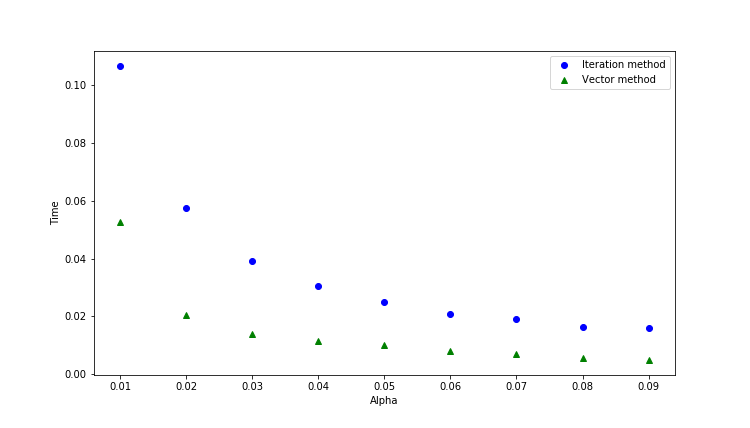

In [27]:
import time
time_iteration=[]
time_vector=[]
for alpha in alpha_values:
    start = time.time()
    list(gradient_descent(theta_arr, x_training_normalized, y_training_normalized, alpha=alpha))
    end = time.time()
    time_vector.append(end-start)
    start = time.time()
    gradient_descent_iter(list(zip(x_training_normalized.tolist(), y_training_normalized.tolist())), *theta_arr.tolist(), alpha=alpha)
    end = time.time()
    time_iteration.append(end-start)
plt.figure()
plt.plot(alpha_values, time_iteration, "bo", label="Iteration method")
plt.plot(alpha_values, time_vector, "g^", label="Vector method")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Time")
plt.show()

<IPython.core.display.Javascript object>


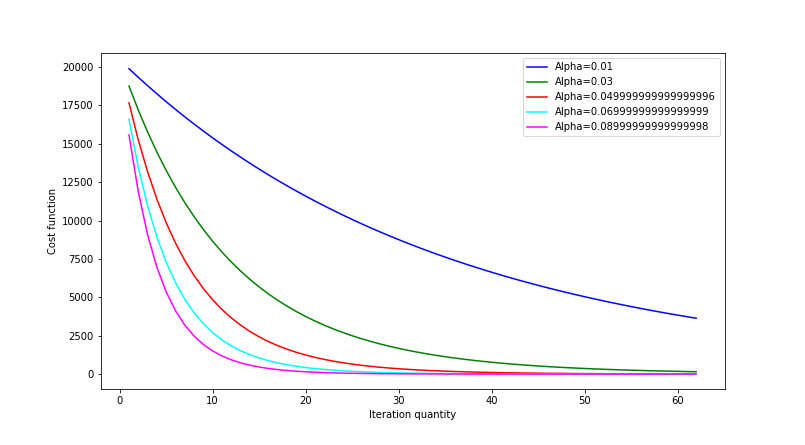

In [34]:
alpha_values=np.arange(0.01, 0.1, 0.02)
plt.figure()
cost_values={}
for alpha in alpha_values:
    cost_values[alpha]=[]
    for opt_theta in gradient_descent(theta_arr, x_training_normalized, y_training_normalized, alpha=alpha):
        hypothesis=get_hypothesis(opt_theta)
        current_cost=get_calculate_cost(hypothesis)(x_training_normalized, y_training_normalized)
        cost_values[alpha].append(current_cost)
min_len=min(len(values) for values in cost_values.values())
colors=["blue", "green", "red", "cyan", "magenta"]
x=list(range(1, min_len+1))
for (index, alpha) in enumerate(alpha_values):
    plt.plot(x, cost_values[alpha][:min_len], label=f"Alpha={alpha}", color=colors[index])
plt.legend()
plt.xlabel("Iteration quantity")
plt.ylabel("Cost function")
plt.show()

In [35]:
opt_theta_gra=list(gradient_descent(theta_arr, x_training_normalized, y_training_normalized, alpha=alpha))[-1]
print(opt_theta_gra)
x_arr_copy=np.column_stack((np.ones(x_training_normalized.shape[0]), x_training_normalized))
opt_theta_analytical=np.dot(np.dot(np.linalg.inv(np.dot(x_arr_copy.T,x_arr_copy)),x_arr_copy.T),y_training_normalized)
print(opt_theta_analytical)

[ 0.28877948  0.85488225 -0.00648034]
[-7.97972799e-17  8.84765988e-01 -5.31788197e-02]
